<a href="https://colab.research.google.com/github/dietmarja/LLM-Elements/blob/main/optimization/AdamW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

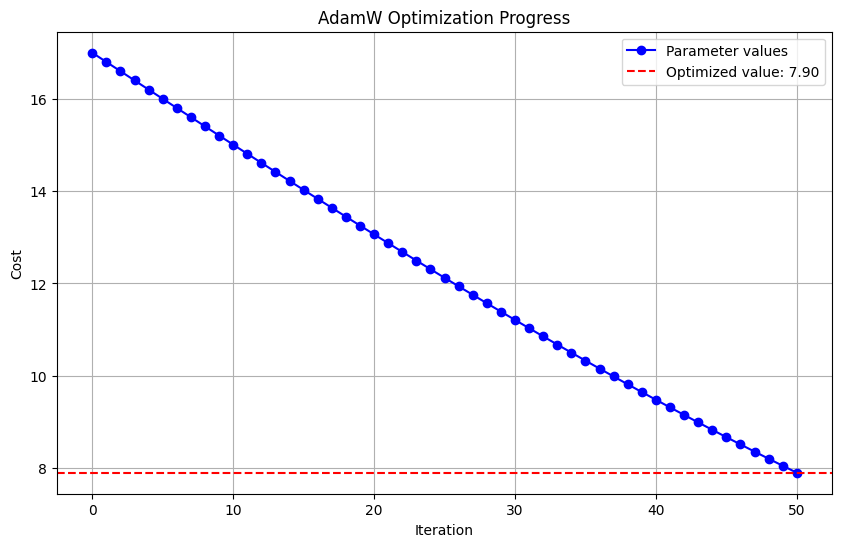

    Iteration  Parameter Value
0           0        17.000000
1           1        16.800000
2           2        16.600065
3           3        16.400240
4           4        16.200569
5           5        16.001098
6           6        15.801873
7           7        15.602939
8           8        15.404343
9           9        15.206131
10         10        15.008348
11         11        14.811042
12         12        14.614257
13         13        14.418040
14         14        14.222434
15         15        14.027485
16         16        13.833236
17         17        13.639731
18         18        13.447011
19         19        13.255120
20         20        13.064098
21         21        12.873984
22         22        12.684818
23         23        12.496638
24         24        12.309481
25         25        12.123384
26         26        11.938380
27         27        11.754505
28         28        11.571791
29         29        11.390270
30         30        11.209972
31      

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def adamw_optimizer(gradient_func, initial_value, learning_rate, num_iterations=50, beta1=0.9, beta2=0.999, epsilon=1e-08, weight_decay=0.01):
    parameter = initial_value
    param_values = [parameter]
    m = 0
    v = 0
    for t in range(1, num_iterations + 1):
        gradient = gradient_func(parameter) + weight_decay * parameter
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        parameter -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        param_values.append(parameter)
    return parameter, param_values

# Example Usage
def compute_gradient(param):
    return 2 * param

# Run AdamW optimizer with a start value of 17.0
optimized_value, param_trajectory = adamw_optimizer(
    gradient_func=compute_gradient, initial_value=17.0, learning_rate=0.2, num_iterations=50
)

# Plot the points considered in finding the best value
plt.figure(figsize=(10, 6))
plt.plot(param_trajectory, 'bo-', label='Parameter values')
plt.axhline(y=optimized_value, color='r', linestyle='--', label=f'Optimized value: {optimized_value:.2f}')
plt.title('AdamW Optimization Progress')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame to store the results
import pandas as pd
iterations = list(range(len(param_trajectory)))
results_df = pd.DataFrame({
    'Iteration': iterations,
    'Parameter Value': param_trajectory
})

# Display the DataFrame
print(results_df)